<a href="https://colab.research.google.com/github/ThomasPickle7/378-Project/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
import scipy.fft

from itertools import cycle

# Load In Data

In [3]:
# Load in the data from the train folder
train_files = glob('train/*')
# play the audio
ipd.Audio(train_files[90])

In [4]:
# Load the audio file using librosa
# y = audio time series
# sr = sampling rate of y
y, sr = librosa.load(train_files[4])


print(f'y: {y[:10]}')
# print the shape of y
print(f'shape y: {y.shape}')
# print the sample rate of the audio file
print(f'sr: {sr}')

y: [-0.08755493 -0.14620972 -0.16326904 -0.08654785 -0.07739258 -0.127594
 -0.11166382 -0.07546997 -0.07901001 -0.10818481]
shape y: (661504,)
sr: 22050


# Plotting Time-series Data

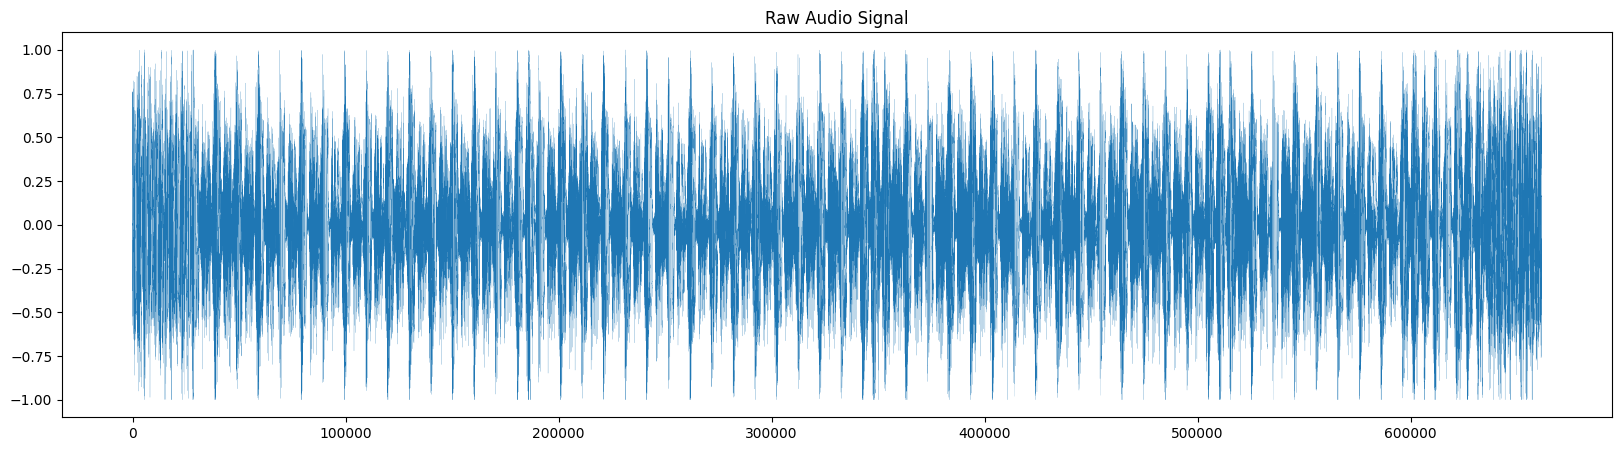

<Axes: title={'center': 'Raw Audio Signal, Zoomed in'}>

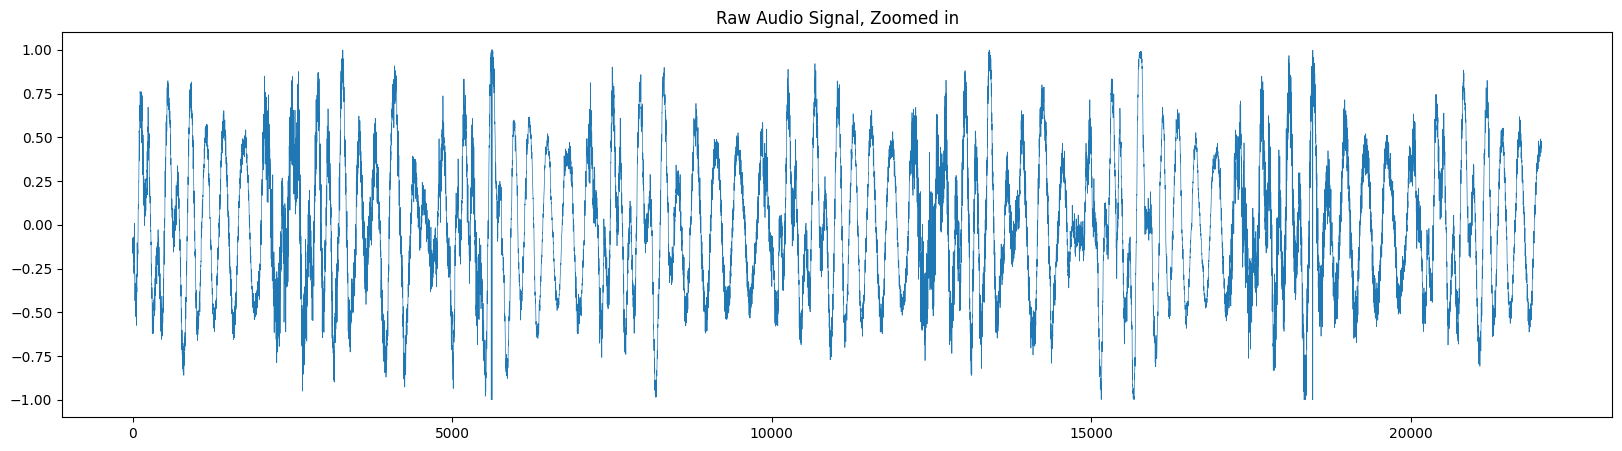

In [5]:

pd.Series(y).plot(figsize=(20, 5), lw=0.1, title='Raw Audio Signal')
plt.show()

pd.Series(y[:22050]).plot(figsize=(20, 5), lw=.5, title='Raw Audio Signal, Zoomed in')

# Compute Spectrogram of Audio Signal

In [6]:
# compute the short-time Fourier transform of the audio signal
D = librosa.stft(y)

# convert the amplitude to decibels
Db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
Db.shape


(1025, 1293)

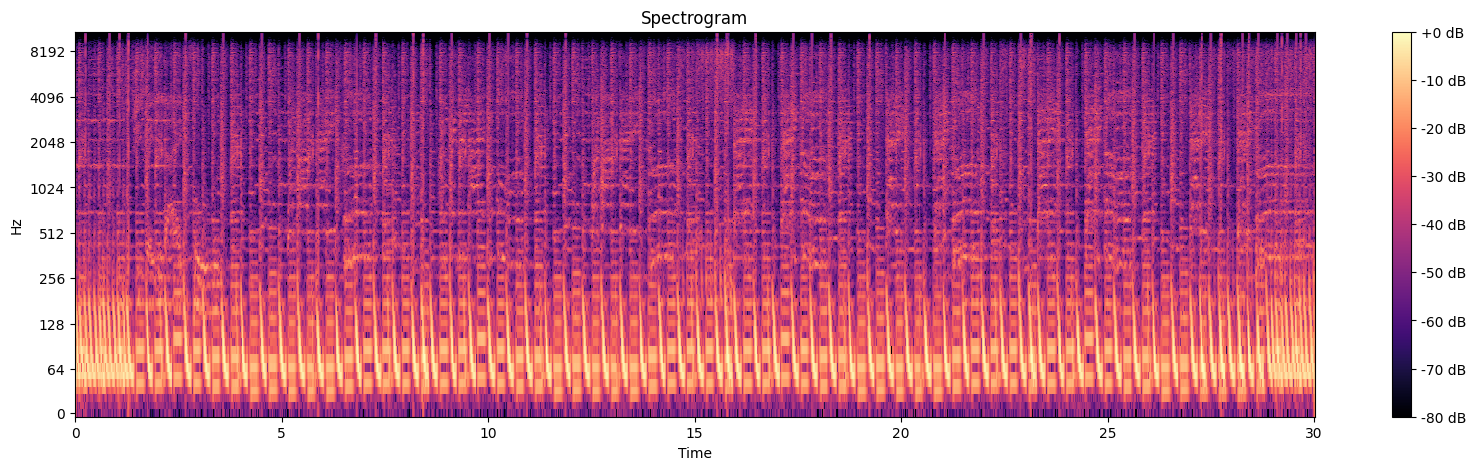

In [7]:
fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(Db, x_axis='time', y_axis='log', sr=sr, ax=ax)
ax.set_title('Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

# Mel Spectrogram

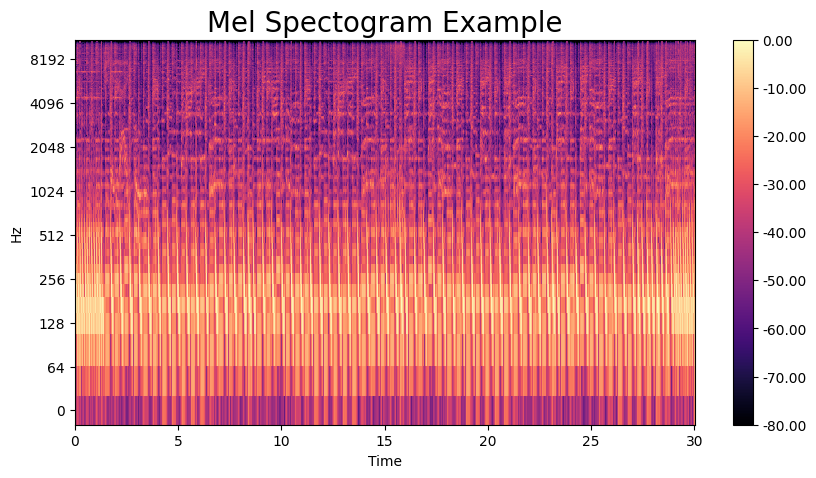

In [8]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
S_db_mel = librosa.power_to_db(S, ref=np.max)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot the mel spectogram
img = librosa.display.specshow(S_db_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Discrete Time Fourier Transform

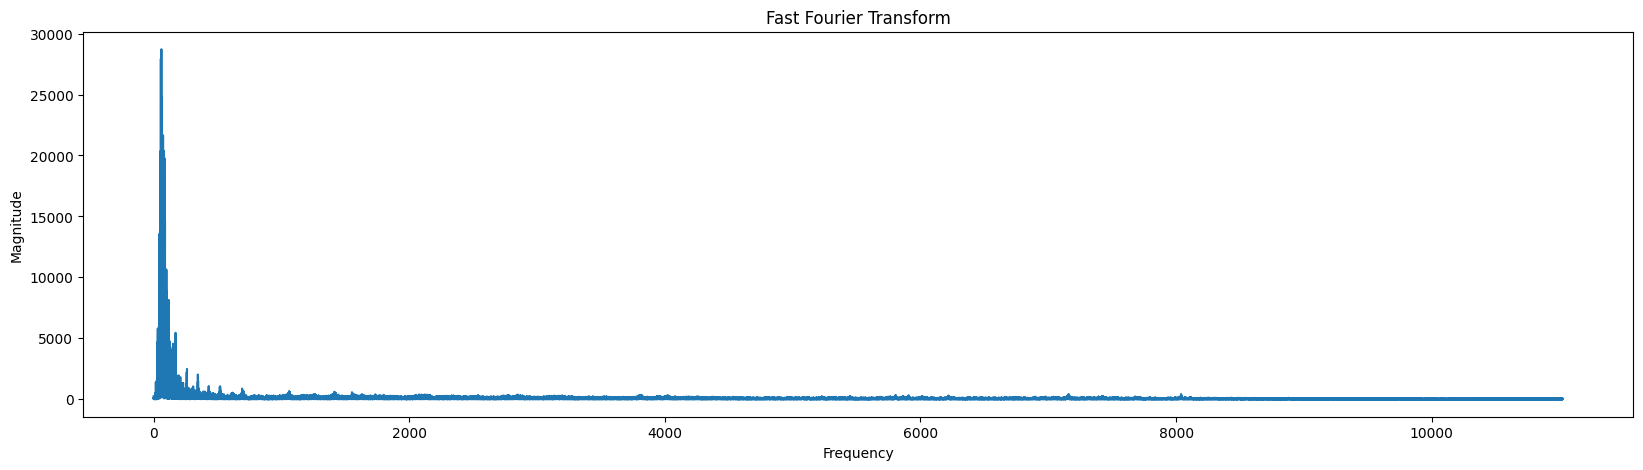

In [9]:
fft = np.fft.fft(y)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(left_frequency, left_magnitude)
ax.set_title('Fast Fourier Transform')
ax.set_xlabel('Frequency')
ax.set_ylabel('Magnitude')
plt.show()


In [10]:
# Load in the data from the train folder
train_files = glob('train/*')

# Load the audio file using librosa
# y = audio time series
# sr = sampling rate of y
time_series = []
sampling_rates = []
#load the first 10 files
for i in range(0, 799):
    y, sr = librosa.load(train_files[i])
    time_series.append(y)
    sampling_rates.append(sr)

# convert the time series and sampling rates to a pandas dataframe
df = pd.DataFrame({'time_series': time_series})
# save the dataframe to a csv file
df.to_csv('time_series.csv', index=False)
print(df)


                                           time_series
0    [-0.027282715, -0.036224365, -0.049926758, -0....
1    [-0.018035889, -0.02142334, -0.018798828, -0.0...
2    [0.063201904, 0.05630493, 0.04446411, 0.031097...
3    [-0.09777832, 0.047027588, 0.35583496, 0.36419...
4    [-0.08755493, -0.14620972, -0.16326904, -0.086...
..                                                 ...
794  [-0.23886108, -0.41534424, -0.3161621, -0.1396...
795  [-0.1217041, -0.11859131, -0.12683105, -0.1308...
796  [0.07397461, 0.06695557, 0.056762695, 0.044403...
797  [-0.013000488, -0.03060913, -0.036071777, -0.0...
798  [-0.040618896, -0.045776367, -0.03967285, -0.0...

[799 rows x 1 columns]
